In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

Importing data from data source (CSV file from Kaggle)

In [2]:
dataset = pd.read_csv('flight_data.csv')
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


1. Data Preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
#   Replace 'Delhi' with 'New Delhi' in both 'Source' and 'Destination' columns

dataset['Source'] = dataset['Source'].replace('Delhi', 'New Delhi')
dataset['Destination'] = dataset['Destination'].replace('Delhi', 'New Delhi')

#   Merge both the 'No Info' & 'No info columns' together
dataset['Additional_Info'] = dataset['Additional_Info'].replace('No Info', 'No info')

dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
dataset['Source'].unique()

array(['Banglore', 'Kolkata', 'New Delhi', 'Chennai', 'Mumbai'],
      dtype=object)

In [7]:
dataset['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [8]:
#   Checking for null values

dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#   Displaying the rows with missing values

dataset[dataset.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,New Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
#   Dropping those rows (since there is only one such row)

dataset.dropna(inplace=True) # Droping the null values as it is only a single value

In [11]:
#   Checking for duplicated values

dataset.duplicated().sum()

220

In [12]:
#   Displaying the duplicated rows

dataset[dataset.duplicated(keep=False)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,New Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,New Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,New Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,New Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,New Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,New Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,New Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,New Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [13]:
#   Dropping the duplicated rows

dataset.drop_duplicates(keep='first', inplace=True)

In [14]:
#   Dropping the 'Routes' column since this is not having much significance

dataset.drop(columns={'Route'},inplace=True)
dataset

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,New Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,New Delhi,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648


From 'Date_of_Journey' we need to extract day/month/year or DD/MM/YYYY

In [15]:
dataset['Day'] = pd.to_datetime(dataset['Date_of_Journey']).dt.day
dataset['Month'] = pd.to_datetime(dataset['Date_of_Journey']).dt.month
dataset['Year'] = pd.to_datetime(dataset['Date_of_Journey']).dt.year

dataset.drop(columns={'Date_of_Journey'},inplace=True)
dataset

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,New Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,New Delhi,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


Preprocessing of the Departure Time: Extracting Departure Hour and Mins

In [16]:
dataset['Dep_hr'] = dataset['Dep_Time'].str.split(':', expand = True)[0].astype(int)
dataset['Dep_min'] = dataset['Dep_Time'].str.split(':',expand = True)[1].astype(int)

dataset.drop(columns={'Dep_Time'},inplace=True)
dataset

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,New Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,New Delhi,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


Preprocessing of the Arrival Time: Extracting Arrival Hour and Mins

In [17]:
parts = dataset['Arrival_Time'].str.split(':', expand=True)

dataset['Arr_hr'] = parts[0].astype(int)
dataset['Arr_min'] = parts[1].str.split(' ', expand=True)[0].astype(int)

dataset.drop(columns={'Arrival_Time'},inplace=True)
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,New Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,New Delhi,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


Preprocessing of the Total Flight Duration

In [18]:
#   There was one such row where the duration was only 5m, which is not practically possible. So, dropping the row.

dataset = dataset[dataset['Duration'] != '5m']
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,New Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,New Delhi,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [19]:
duration = dataset['Duration'].str.split(' ', expand=True)
duration[1].fillna('0m', inplace=True)
duration.value_counts()

0    1  
2h   50m    544
1h   30m    386
2h   45m    335
     55m    332
     35m    329
           ... 
29h  30m      1
35h  35m      1
37h  10m      1
36h  25m      1
28h  55m      1
Name: count, Length: 367, dtype: int64

In [20]:
#   Preprocessing hours component

hours = duration[0].str.split('h', expand=True)[0].astype(int)
hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: 0, Length: 10461, dtype: int32

In [21]:
#   Preprocessing minutes component

mins = duration[1].str.split('m', expand=True)[0].astype(int)
mins = round(mins/60, 2)
mins

0        0.83
1        0.42
2        0.00
3        0.42
4        0.75
         ... 
10678    0.50
10679    0.58
10680    0.00
10681    0.67
10682    0.33
Name: 0, Length: 10461, dtype: float64

In [22]:
dataset['Duration'] = hours + mins
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,2.83,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7.42,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,New Delhi,Cochin,19.00,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5.42,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4.75,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2.50,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,2.58,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,New Delhi,3.00,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,2.67,non-stop,No info,12648,1,3,2019,11,30,14,10


Preprocessing the Total no. of stops

In [23]:
dataset['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [24]:
dataset['Total_Stops'] = dataset['Total_Stops'].str.replace('non-stop','0 stops')
dataset['Total_Stops'] = dataset['Total_Stops'].str.split(' ',expand=True)[0].astype(int)
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,2.83,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7.42,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,New Delhi,Cochin,19.00,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5.42,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4.75,1,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2.50,0,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,2.58,0,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,New Delhi,3.00,0,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,2.67,0,No info,12648,1,3,2019,11,30,14,10


In [25]:
dataset['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [26]:
dataset = dataset[['Airline', 'Source', 'Destination', 'Day', 'Month', 'Year', 'Total_Stops',
                   'Dep_hr', 'Dep_min', 'Arr_hr', 'Arr_min', 'Duration', 'Additional_Info', 'Price']]
dataset

,Airline,Source,Destination,Day,Month,Year,Total_Stops,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,24,3,2019,0,22,20,1,10,2.83,No info,3897
1,Air India,Kolkata,Banglore,1,5,2019,2,5,50,13,15,7.42,No info,7662
2,Jet Airways,New Delhi,Cochin,9,6,2019,2,9,25,4,25,19.00,No info,13882
3,IndiGo,Kolkata,Banglore,12,5,2019,1,18,5,23,30,5.42,No info,6218
4,IndiGo,Banglore,New Delhi,1,3,2019,1,16,50,21,35,4.75,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,9,4,2019,0,19,55,22,25,2.50,No info,4107
10679,Air India,Kolkata,Banglore,27,4,2019,0,20,45,23,20,2.58,No info,4145
10680,Jet Airways,Banglore,New Delhi,27,4,2019,0,8,20,11,20,3.00,No info,7229
10681,Vistara,Banglore,New Delhi,1,3,2019,0,11,30,14,10,2.67,No info,12648


##  Exploratory Data Analysis

1. How Price Varies with Airlines

2. How Price Varies with Total stops

3. How Price Varies with Month

4. How Price Varies with Additional Information

5. Which Source has Maximum number of Flights

6. How Price Varies with Source

7. Which Destination has Maximum number of Flights

8. How Price Varies with Destination

9. How Price Varies with Departure Hours

10. How Price Varies with Arrival Hours

11. How Duration Varies with the price

|----------------------------------------------------------------------------------------------------------------|
|----------------------------------------------------------------------------------------------------------------|

1. How Price Varies with Airlines

In [27]:
dataset['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1693
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [28]:
grouped_by_airline = dataset.groupby('Airline')['Price'].mean()
grouped_by_airline = grouped_by_airline.sort_values(ascending=False)
grouped_by_airline

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11599.021081
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9552.018311
Vistara Premium economy               8962.333333
Vistara                               7801.355649
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5590.260188
SpiceJet                              4335.841718
Trujet                                4140.000000
Name: Price, dtype: float64

In [29]:
fig = px.bar(grouped_by_airline, color = grouped_by_airline.values, color_continuous_scale = 'RdBu')

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Airline',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Airline',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    xaxis_tickangle = 45,  # Rotate x-axis labels for better readability
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

In [30]:
# # Create the bar plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x=grouped_by_airline.index, y=grouped_by_airline.values, palette='Blues_d')

# # Title and axis labels
# plt.title('Average Flight Prices by Airline', fontsize=16, ha='center')  # Title with center alignment
# plt.xlabel('Airline', fontsize=14)
# plt.ylabel('Average Price (in USD)', fontsize=14)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Customize plot appearance
# sns.set_theme(style='whitegrid')  # Set the grid style

# # Display the plot
# plt.tight_layout()  # Adjust layout to prevent clipping
# plt.show()

2. How Price Varies with Total Stops

In [31]:
grouped_by_stops = dataset.groupby('Total_Stops')['Price'].mean()
grouped_by_stops = grouped_by_stops.sort_values(ascending=False)
grouped_by_stops

Total_Stops
4    17686.000000
3    13260.674419
2    12757.632498
1    10594.123556
0     5018.506763
Name: Price, dtype: float64

In [32]:
fig = px.bar(grouped_by_stops, color = grouped_by_stops.values, color_continuous_scale = 'Viridis')

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Total Stops',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Total stops',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

3. How Price varies with Month

In [33]:
grouped_by_month = dataset.groupby('Month')['Price'].mean()
grouped_by_month

Month
3    10692.920060
4     5766.545455
5     9029.239764
6     8736.152522
Name: Price, dtype: float64

In [34]:
fig = px.line(grouped_by_month)

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Month',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Month',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

4. Variation of Price with Additional Info

In [35]:
grouped_by_add_info = dataset.groupby('Additional_Info')['Price'].mean()
grouped_by_add_info = grouped_by_add_info.sort_values(ascending=False)
grouped_by_add_info

Additional_Info
Business class                  56811.250000
1 Short layover                 26743.000000
2 Long layover                  26480.000000
1 Long layover                  22109.631579
Change airports                 16800.714286
Red-eye flight                  10873.000000
In-flight meal not included      9435.647456
No info                          9073.871334
No check-in baggage included     3642.465409
Name: Price, dtype: float64

In [36]:
fig = px.bar(grouped_by_add_info, color = grouped_by_add_info.values, color_continuous_scale = 'Viridis')

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Additional Info',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Additional Info',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    xaxis_tickangle = 45,  # Rotate x-axis labels for better readability
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

5. Which Source has the Maximum number of flights

In [37]:
grouped_by_source = dataset.groupby('Source')['Airline'].count()
grouped_by_source = grouped_by_source.sort_values(ascending=False)
grouped_by_source

Source
New Delhi    4345
Kolkata      2860
Banglore     2179
Mumbai        696
Chennai       381
Name: Airline, dtype: int64

In [38]:
fig = px.bar(grouped_by_source, color = grouped_by_source.values, color_continuous_scale = 'Viridis')

# Update layout and styling
fig.update_layout(
    title = 'No. of flights from each Source',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Source Airport',
    yaxis_title = 'No. of flights',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

6. How Price Varies with Source

In [39]:
grouped_by_source_price = dataset.groupby('Source')['Price'].mean()
grouped_by_source_price = grouped_by_source_price.sort_values(ascending=False)
grouped_by_source_price

Source
New Delhi    10461.600690
Kolkata       9143.083566
Banglore      8022.872877
Mumbai        5042.083333
Chennai       4789.892388
Name: Price, dtype: float64

In [40]:
fig = px.bar(grouped_by_source_price, color = grouped_by_source_price.values, color_continuous_scale = 'Cividis')

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Source',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Source Airport',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

7. Which Destination has the Maximum nummber of flights

In [41]:
grouped_by_destination = dataset.groupby('Destination')['Airline'].count()
grouped_by_destination = grouped_by_destination.sort_values(ascending=False)
grouped_by_destination

Destination
Cochin       4345
Banglore     2860
New Delhi    2179
Hyderabad     696
Kolkata       381
Name: Airline, dtype: int64

In [42]:
fig = px.bar(grouped_by_destination, color = grouped_by_destination.values, color_continuous_scale = 'Viridis')

# Update layout and styling
fig.update_layout(
    title = 'No. of flights by each Destination',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Destination Airport',
    yaxis_title = 'No. of flights',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

8. How Price Varies with Destination

In [43]:
grouped_by_destination_price = dataset.groupby('Destination')['Price'].mean()
grouped_by_destination_price = grouped_by_destination_price.sort_values(ascending=False)
grouped_by_destination_price

Destination
Cochin       10461.600690
Banglore      9143.083566
New Delhi     8022.872877
Hyderabad     5042.083333
Kolkata       4789.892388
Name: Price, dtype: float64

In [44]:
fig = px.bar(grouped_by_destination_price, color = grouped_by_destination_price.values, color_continuous_scale = 'Cividis')

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Destination',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Destination Airport',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

9. How Price varies with Departure Hours

In [45]:
grouped_by_departure = dataset.groupby('Dep_hr')['Price'].mean()
grouped_by_departure = grouped_by_departure
grouped_by_departure

Dep_hr
0      7615.075000
1      4354.621622
2      8419.974227
3     10474.625000
4      7266.520710
5      9480.309278
6      8252.195556
7      8485.902665
8     10073.923631
9      9559.092551
10     8870.728653
11     9296.739206
12     9251.573034
13     8998.725061
14     9816.409901
15     7687.410658
16    10315.573913
17     8710.355588
18    10043.981859
19     8344.700368
20     9683.838213
21     8450.296524
22     7765.975871
23     8487.338346
Name: Price, dtype: float64

In [46]:
fig = px.line(grouped_by_departure)

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Departure Hours',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Departure Hour',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

10. How Price Varies with Arrival Hours

In [47]:
grouped_by_arrival = dataset.groupby('Arr_hr')['Price'].mean()
grouped_by_arrival

Arr_hr
0      5642.447205
1      9636.845714
2      5151.886076
3      4934.638298
4     11355.286465
5     15532.151515
6      5819.470588
7      7796.538647
8      8051.175214
9      9203.018405
10     8118.831224
11     7417.629630
12     9560.559814
13     7499.521452
14     6627.581633
15     8925.412088
16     9250.292683
17     5820.633508
18    10612.119843
19    10936.235521
20     8267.570292
21     8676.784593
22     7575.583591
23     8947.058212
Name: Price, dtype: float64

In [48]:
fig = px.line(grouped_by_arrival)

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Arrival Hours',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Arrival Hour',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

11. How Price Varies with Duration

In [49]:
grouped_by_duration = dataset.groupby('Duration')['Price'].mean()
grouped_by_duration

Duration
1.25      3944.333333
1.33      3286.377049
1.42      5011.162963
1.50      3721.484456
1.58      2276.133333
             ...     
41.33    13990.000000
42.08    11664.000000
42.75    12819.000000
47.00    20064.000000
47.67    20694.000000
Name: Price, Length: 367, dtype: float64

In [50]:
fig = px.line(grouped_by_duration)

# Update layout and styling
fig.update_layout(
    title = 'Average Flight Prices by Duration',
    title_x = 0.5,  # Center the title
    xaxis_title = 'Duration (in hrs)',
    yaxis_title = 'Average Price',
    #plot_bgcolor = 'rgba(240, 240, 240, 1)',  # Light background color
    bargap = 0.25,  # Adjust gap between bars
    font = dict(family = 'Arial', size = 12, color = 'black'),  # Font styling
    showlegend = True,   # Show legend
    margin = dict(t=100, b=50, l=50, r=50)  # Add margin to prevent overlap
)

fig.show()

### Statistical Analysis of all Aspects

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10461 non-null  object 
 1   Source           10461 non-null  object 
 2   Destination      10461 non-null  object 
 3   Day              10461 non-null  int32  
 4   Month            10461 non-null  int32  
 5   Year             10461 non-null  int32  
 6   Total_Stops      10461 non-null  int32  
 7   Dep_hr           10461 non-null  int32  
 8   Dep_min          10461 non-null  int32  
 9   Arr_hr           10461 non-null  int32  
 10  Arr_min          10461 non-null  int32  
 11  Duration         10461 non-null  float64
 12  Additional_Info  10461 non-null  object 
 13  Price            10461 non-null  int64  
dtypes: float64(1), int32(8), int64(1), object(4)
memory usage: 899.0+ KB


In [52]:
numeric_columns = dataset[['Day', 'Month', 'Total_Stops', 'Dep_hr', 'Arr_hr', 'Duration', 'Price']]
numeric_columns

,Day,Month,Total_Stops,Dep_hr,Arr_hr,Duration,Price
0,24,3,0,22,1,2.83,3897
1,1,5,2,5,13,7.42,7662
2,9,6,2,9,4,19.00,13882
3,12,5,1,18,23,5.42,6218
4,1,3,1,16,21,4.75,13302
...,...,...,...,...,...,...,...
10678,9,4,0,19,22,2.50,4107
10679,27,4,0,20,23,2.58,4145
10680,27,4,0,8,11,3.00,7229
10681,1,3,0,11,14,2.67,12648


### Skewness

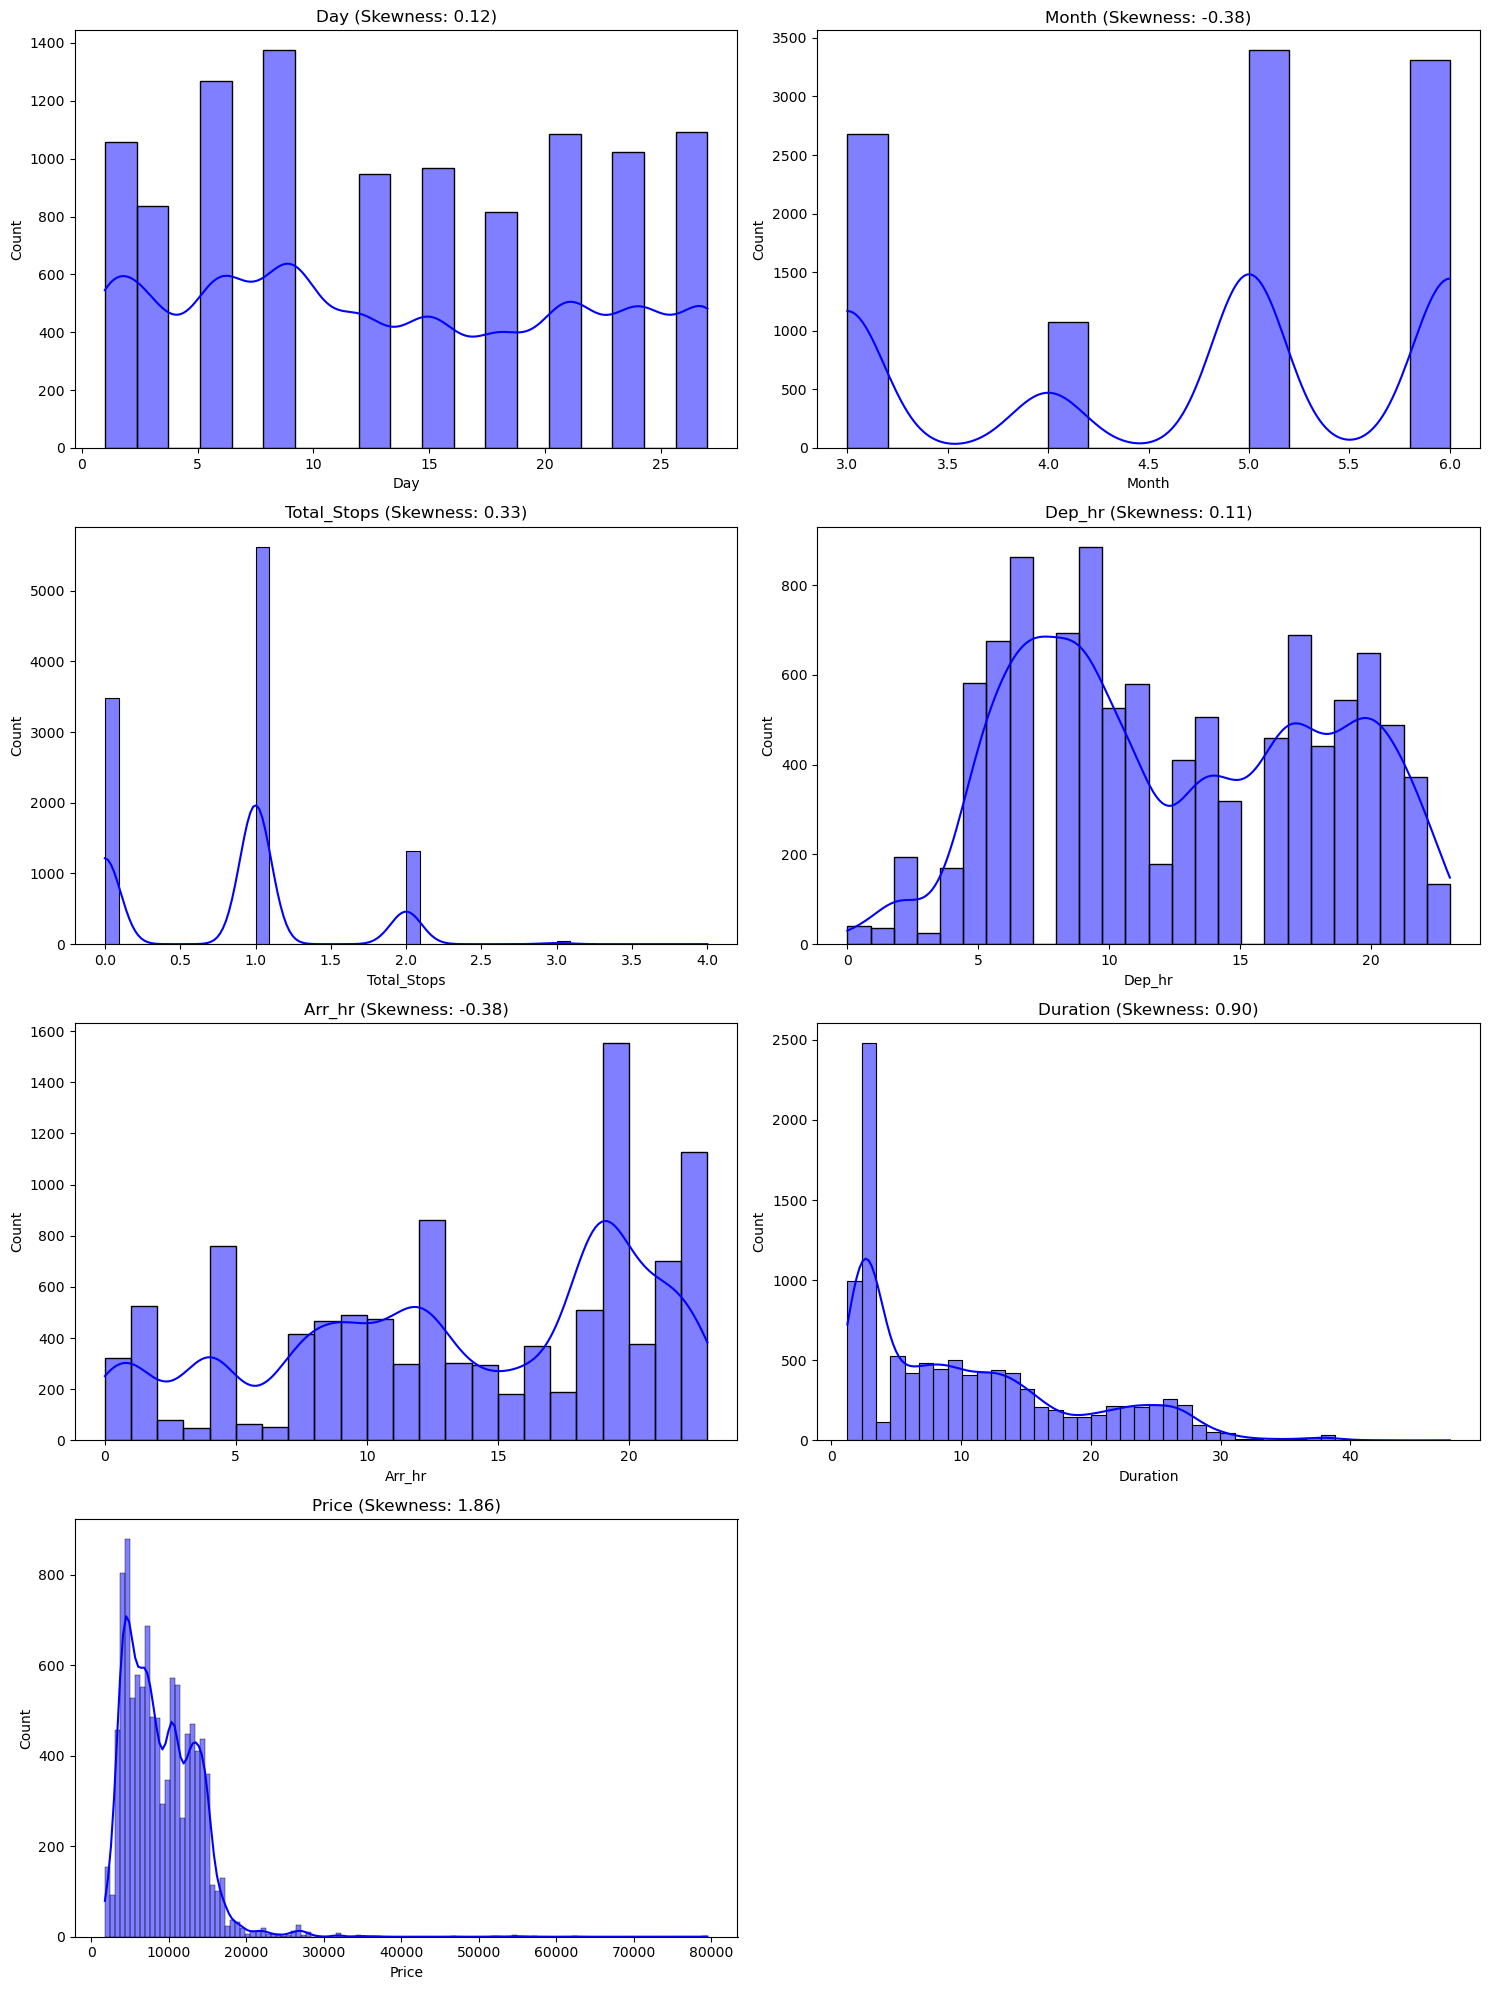

In [53]:
from scipy.stats import skew

def plot_feature_skewness(dataset):
    
    # Set the number of rows and columns for the plot grid
    num_plots = len(numeric_columns.columns)
    num_cols = 2  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows dynamically

    # Set the figure size
    plt.figure(figsize = (15, 5 * num_rows))
    
    for i, feature in enumerate(numeric_columns.columns, 1):
        plt.subplot(num_rows, num_cols, i)
        
        # Calculate skewness for the feature
        skewness_value = skew(dataset[feature].dropna())
        
        # Plot distribution using seaborn's distplot
        sns.histplot(dataset[feature].dropna(), kde = True, color = 'blue')
        plt.title(f'{feature} (Skewness: {skewness_value:.2f})')
    
    plt.tight_layout()  # Adjust subplots to fit in the figure area
    plt.show()

plot_feature_skewness(dataset)

### Kurtosis

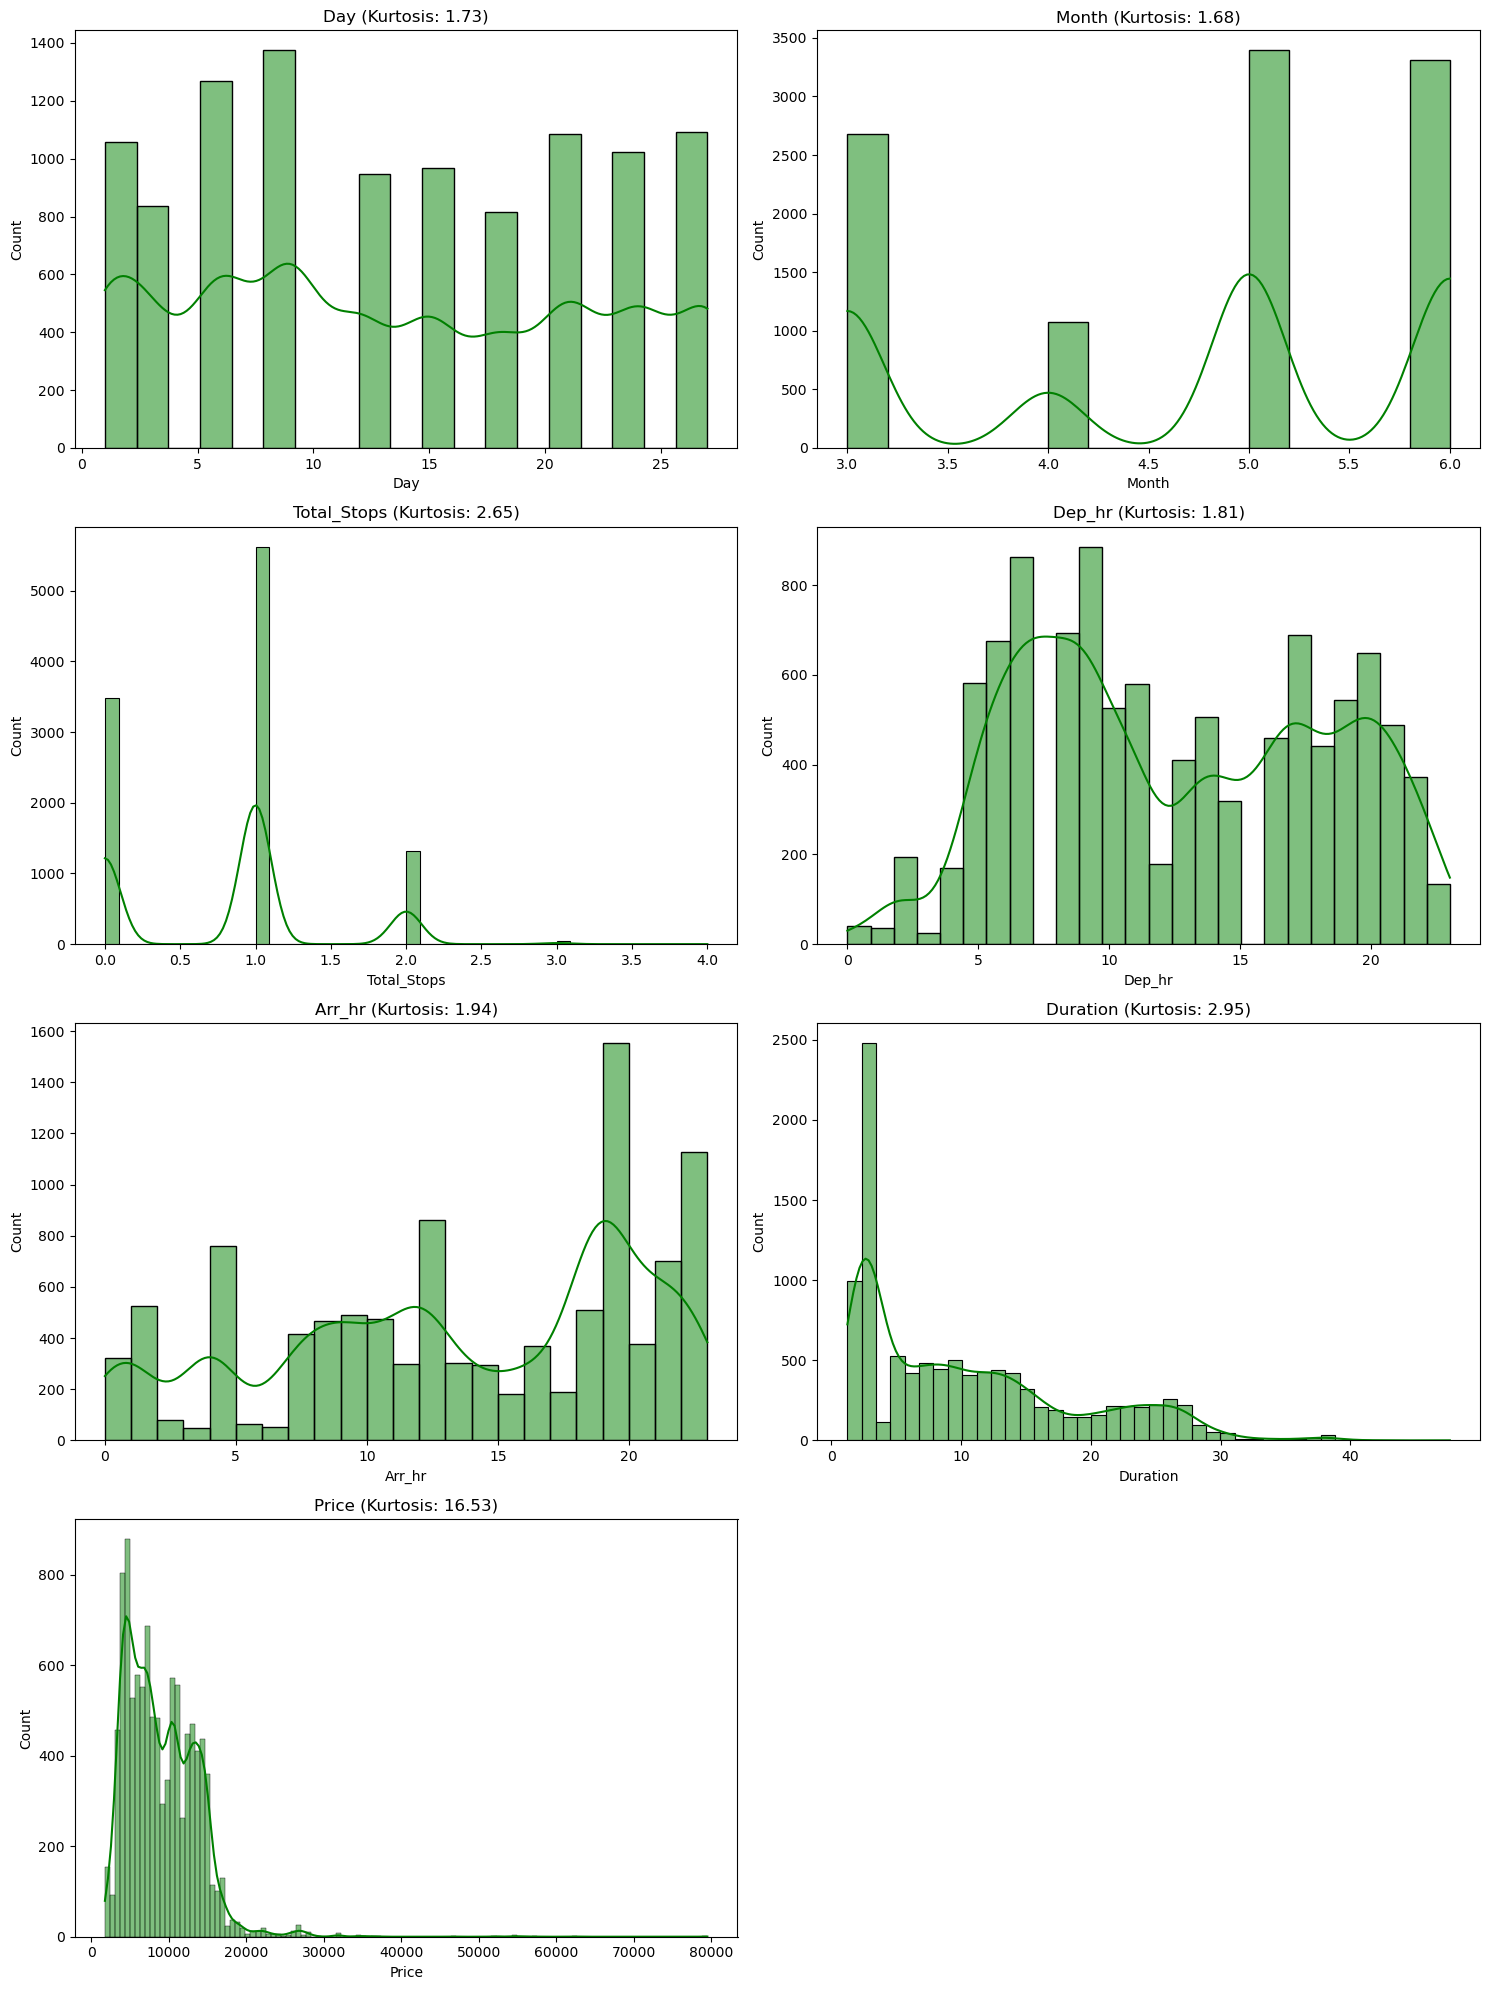

In [54]:
from scipy.stats import kurtosis

def plot_feature_kurtosis(dataset):

    # Set the number of rows and columns for the plot grid
    num_plots = len(numeric_columns.columns)
    num_cols = 2  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows dynamically

    # Set the figure size
    plt.figure(figsize=(15, 5 * num_rows))
    for i, feature in enumerate(numeric_columns.columns, 1):
        plt.subplot(num_rows, num_cols, i)

        # Calculate kurtosis for the feature
        kurtosis_value = kurtosis(dataset[feature].dropna(), fisher=False)  # fisher=False for regular kurtosis

        # Plot distribution using seaborn's distplot
        sns.histplot(dataset[feature].dropna(), kde = True, color = 'green')
        plt.title(f'{feature} (Kurtosis: {kurtosis_value:.2f})')

    plt.tight_layout()  # Adjust subplots to fit in the figure area
    plt.show()

plot_feature_kurtosis(dataset)

### Handling Outliers

Box Plots

In [55]:
#   Calculate Q1, Q3, and IQR
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)
IQR = Q3 - Q1

#   Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#   Filter out the outliers
filtered_dataset = dataset[(dataset['Price'] >= lower_bound) & (dataset['Price'] <= upper_bound)]

#   Create box plot with outliers
fig_with_outliers = px.box(dataset, y = 'Price', title = 'Box Plot of Price (With Outliers)', labels = {'Price': 'Price'})

#   Create box plot without outliers
fig_without_outliers = px.box(filtered_dataset, y = 'Price', title = 'Box Plot of Price (Without Outliers)', labels = {'Price': 'Price'})

#   Using subplots to show both plots in one figure
fig = go.Figure()

#   Add box plot with outliers
fig.add_trace(go.Box(y = dataset['Price'], name = "With Outliers"))

# Add box plot without outliers
fig.add_trace(go.Box(y = filtered_dataset['Price'], name = "Without Outliers"))

# Customize the layout of the combined plot
fig.update_layout(
    title = "Comparison of Box Plots (With vs. Without Outliers)",
    title_x = 0.5,  # Center the title
    xaxis_title = "Dataset",
    yaxis_title = "Price",
    showlegend = True
)

# Show the combined plot
fig.show()

KDE Plots

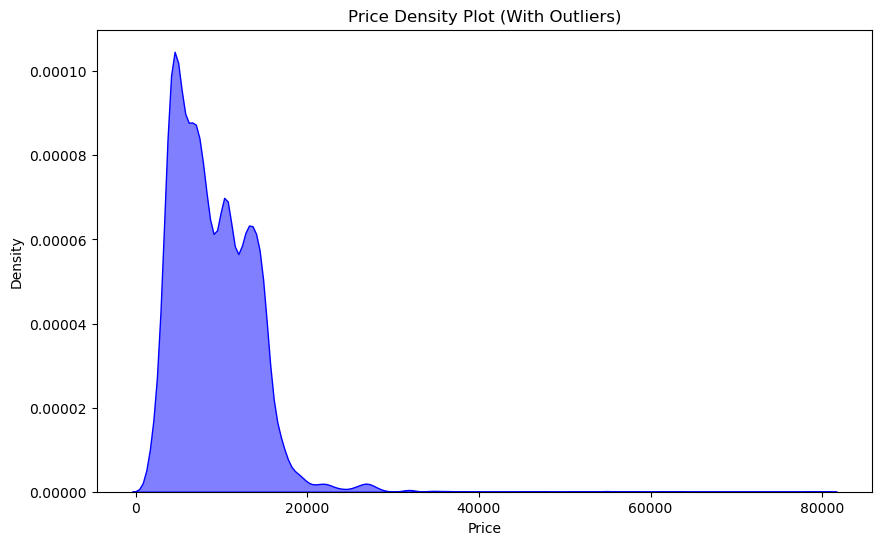

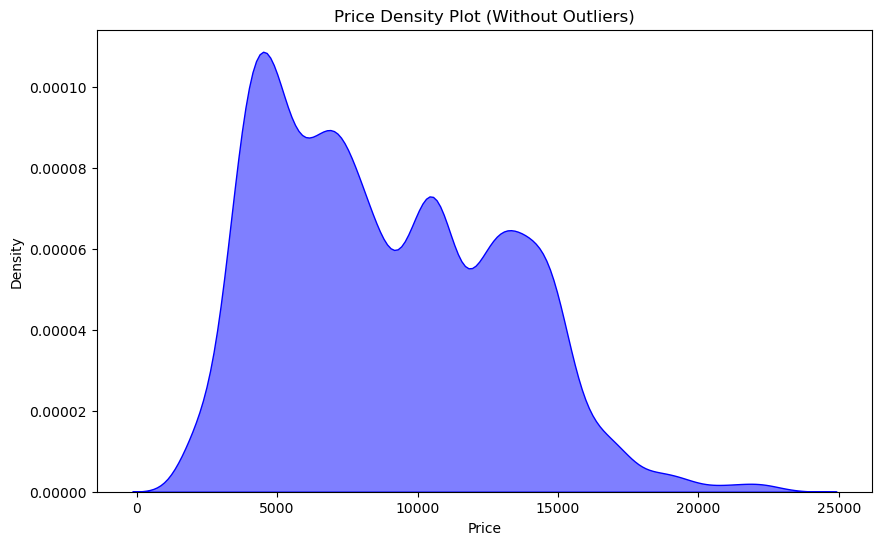

In [56]:
# KDE plot with outliers

plt.figure(figsize = (10, 6))
sns.kdeplot(data = dataset['Price'], color = 'blue', fill = True, alpha = 0.5)
plt.title('Price Density Plot (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# KDE plot without outliers

plt.figure(figsize=(10, 6))
sns.kdeplot(data = filtered_dataset['Price'], color = 'blue', fill = True, alpha = 0.5)
plt.title('Price Density Plot (Without Outliers)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [57]:
#   Best strategy is to remove the outliers and use the filtered dataset

dataset = filtered_dataset.reset_index(inplace=False, drop=True)
dataset

,Airline,Source,Destination,Day,Month,Year,Total_Stops,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,24,3,2019,0,22,20,1,10,2.83,No info,3897
1,Air India,Kolkata,Banglore,1,5,2019,2,5,50,13,15,7.42,No info,7662
2,Jet Airways,New Delhi,Cochin,9,6,2019,2,9,25,4,25,19.00,No info,13882
3,IndiGo,Kolkata,Banglore,12,5,2019,1,18,5,23,30,5.42,No info,6218
4,IndiGo,Banglore,New Delhi,1,3,2019,1,16,50,21,35,4.75,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10362,Air Asia,Kolkata,Banglore,9,4,2019,0,19,55,22,25,2.50,No info,4107
10363,Air India,Kolkata,Banglore,27,4,2019,0,20,45,23,20,2.58,No info,4145
10364,Jet Airways,Banglore,New Delhi,27,4,2019,0,8,20,11,20,3.00,No info,7229
10365,Vistara,Banglore,New Delhi,1,3,2019,0,11,30,14,10,2.67,No info,12648


Plotting regression plots

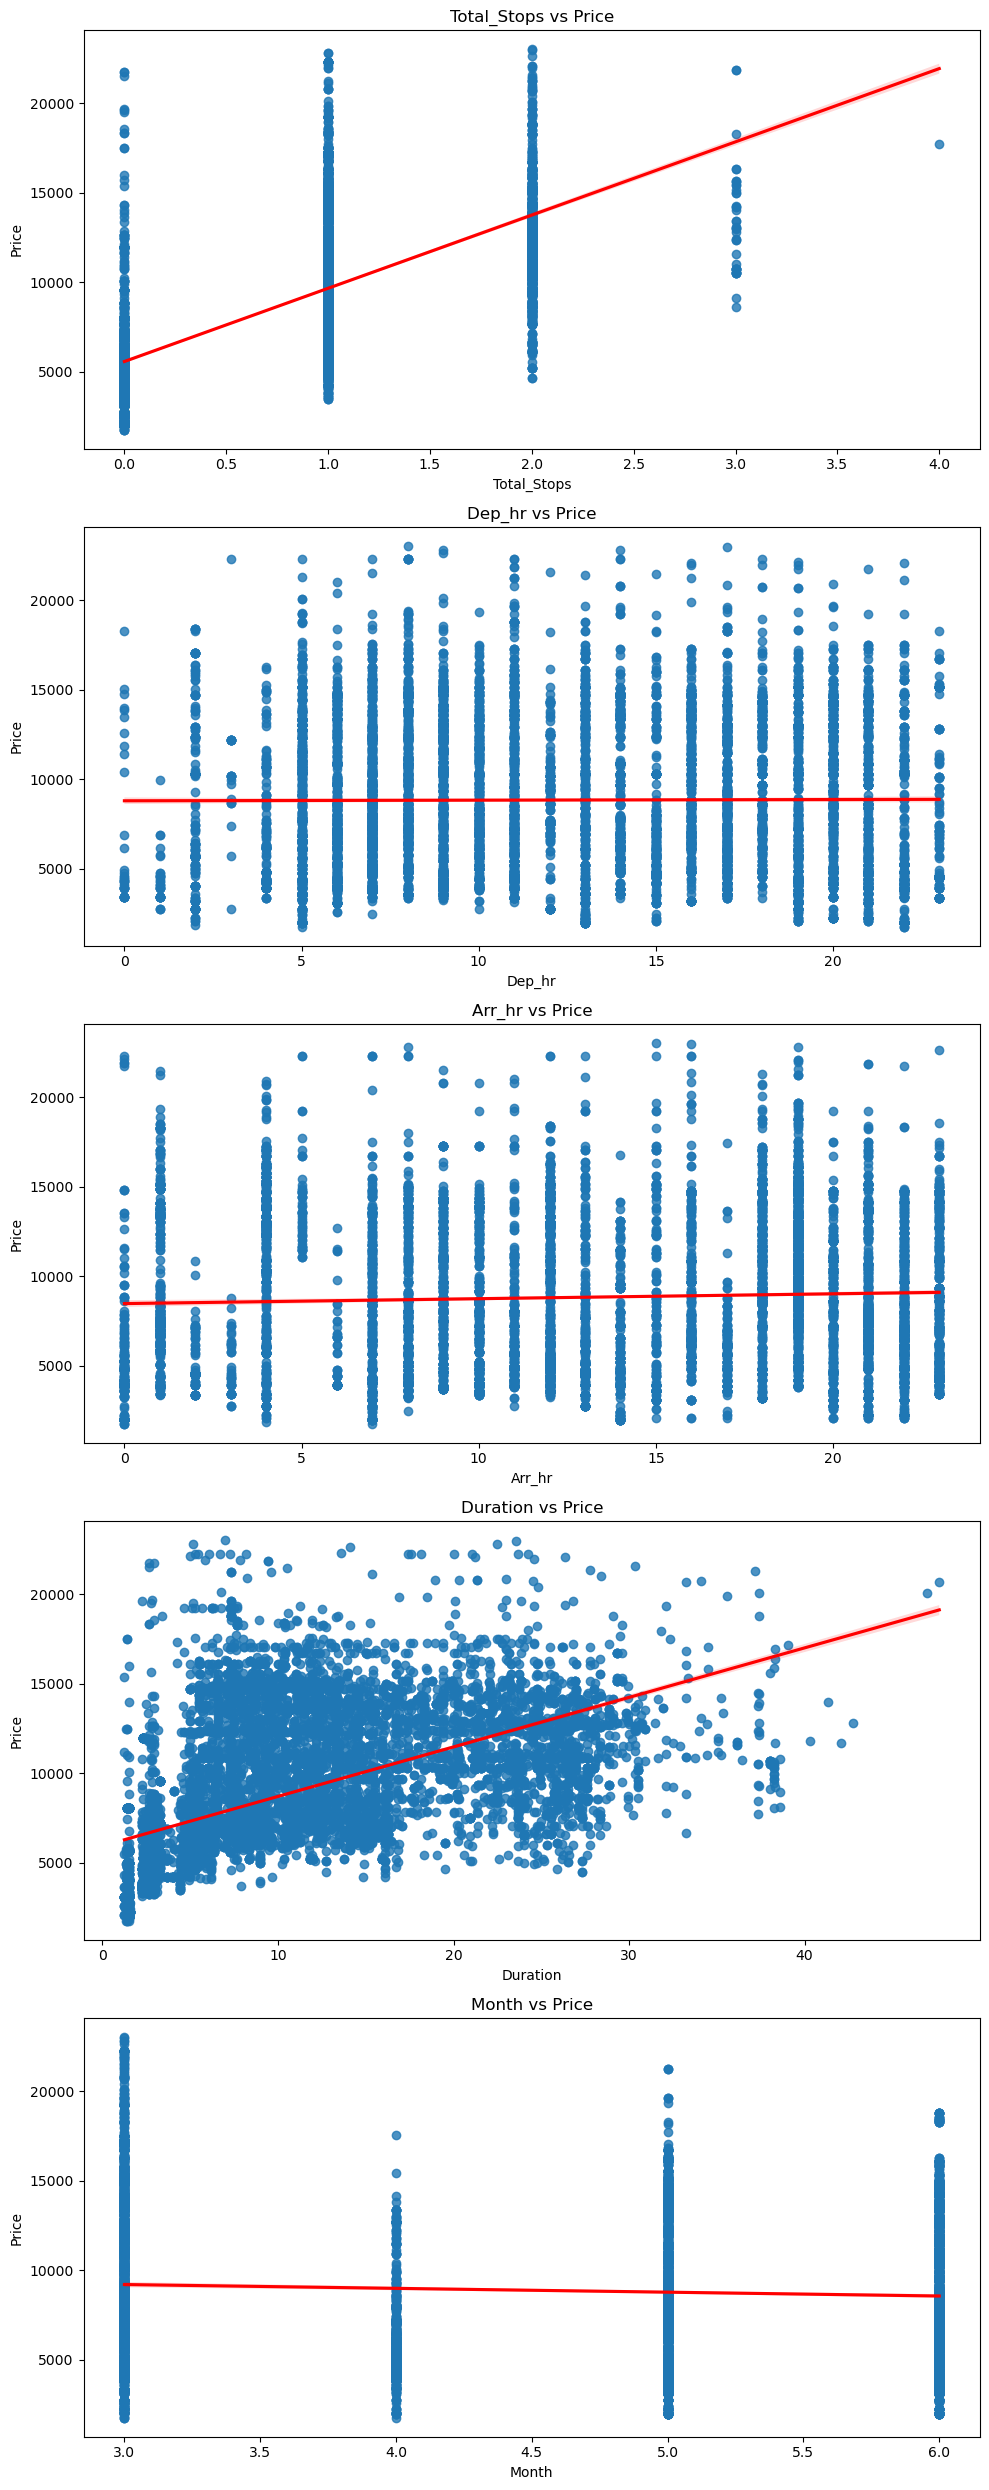

In [58]:
def plot_regression_plots(dataset, variables, target):
    # Create subplots with 1 column and as many rows as there are variables
    fig, axes = plt.subplots(len(variables), 1, figsize = (10, 5 * len(variables)))
    
    # If there is only one plot, axes will not be an array, so we ensure it is iterable
    if len(variables) == 1:
        axes = [axes]

    for i, var in enumerate(variables):
        sns.regplot(x = dataset[var], y = dataset[target], ax = axes[i], line_kws = {'color': 'red'})
        axes[i].set_title(f'{var} vs {target}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

plot_regression_plots(dataset, ['Total_Stops', 'Dep_hr', 'Arr_hr', 'Duration', 'Month'], 'Price')

### Modelling

In [59]:
X = dataset.drop(columns = ["Price"])
y = dataset["Price"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [61]:
X_train

,Airline,Source,Destination,Day,Month,Year,Total_Stops,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration,Additional_Info
7136,SpiceJet,Mumbai,Hyderabad,12,5,2019,0,5,45,7,15,1.50,No check-in baggage included
5120,Air India,Kolkata,Banglore,6,6,2019,2,10,0,1,20,15.33,No info
9960,Jet Airways,Kolkata,Banglore,21,5,2019,1,6,30,19,50,13.33,No info
1817,Jet Airways,Kolkata,Banglore,24,3,2019,1,21,10,19,40,22.50,In-flight meal not included
1937,Air India,New Delhi,Cochin,6,6,2019,2,12,0,19,15,7.25,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,New Delhi,Cochin,27,6,2019,2,6,45,12,35,29.83,In-flight meal not included
5191,IndiGo,Kolkata,Banglore,1,5,2019,0,22,15,0,50,2.58,No info
5390,Jet Airways,New Delhi,Cochin,12,6,2019,2,5,30,19,0,13.50,No info
860,Multiple carriers,New Delhi,Cochin,21,3,2019,1,13,0,21,0,8.00,No info


In [62]:
X_test

,Airline,Source,Destination,Day,Month,Year,Total_Stops,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration,Additional_Info
1803,Jet Airways,Kolkata,Banglore,6,5,2019,1,18,55,4,40,9.75,No info
321,SpiceJet,Kolkata,Banglore,15,6,2019,0,14,55,17,25,2.50,No check-in baggage included
7316,Air India,Banglore,New Delhi,9,4,2019,0,17,0,19,50,2.83,No info
8064,Air India,Banglore,New Delhi,24,4,2019,0,10,0,12,45,2.75,No info
10055,Air India,Kolkata,Banglore,9,5,2019,1,16,45,21,5,28.33,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,IndiGo,Banglore,New Delhi,3,6,2019,0,8,30,11,20,2.83,No info
7713,Air Asia,Kolkata,Banglore,21,6,2019,0,22,50,1,20,2.50,No info
1897,Jet Airways,New Delhi,Cochin,27,5,2019,1,19,45,19,0,23.25,In-flight meal not included
5718,SpiceJet,Kolkata,Banglore,24,3,2019,0,9,0,11,30,2.50,No check-in baggage included


In [63]:
y_train

7136     1965
5120    13033
9960    14781
1817    10031
1937     8603
        ...  
5734    10919
5191     4804
5390    13014
860      7618
7270     5618
Name: Price, Length: 8293, dtype: int64

In [64]:
y_test

1803     13941
321       3841
7316      5911
8064      6121
10055     7662
         ...  
5683      4823
7713      3807
1897     12898
5718      5201
7488      6593
Name: Price, Length: 2074, dtype: int64

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8293, 13)
(2074, 13)
(8293,)
(2074,)


In [66]:
categorical_features = ['Airline', 'Source', 'Destination']
numerical_features = ['Day', 'Month', 'Year', 'Total_Stops', 'Dep_hr', 'Dep_min', 'Arr_hr', 'Arr_min', 'Duration']

In [67]:
categorical_features

['Airline', 'Source', 'Destination']

In [68]:
numerical_features

['Day',
 'Month',
 'Year',
 'Total_Stops',
 'Dep_hr',
 'Dep_min',
 'Arr_hr',
 'Arr_min',
 'Duration']

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer ,StandardScaler

preprocessor = ColumnTransformer(
    transformers = [
        ("num", PowerTransformer(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', PowerTransformer(),
                                 ['Day', 'Month', 'Year', 'Total_Stops',
                                  'Dep_hr', 'Dep_min', 'Arr_hr', 'Arr_min',
                                  'Duration']),
                                ('cat', OneHotEncoder(),
                                 ['Airline', 'Source', 'Destination'])])

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge

Define the models with hyperparameters to tune

In [71]:
def define_model(trial):
    
    model_name = trial.suggest_categorical("model", ["Linear Regression", "Ridge", "Random Forest", "XGBoost"])
    
    if model_name == "Linear Regression":
        model = LinearRegression()
    
    elif model_name == "Ridge":
        solver = trial.suggest_categorical("solver", ["auto", "saga", "lsqr"])
        # alpha = trial.suggest_loguniform('ridge_alpha', 1e-3, 10.0)
        alpha = trial.suggest_loguniform('ridge_alpha', 1e-4, 100.0)
        tol = trial.suggest_loguniform("tol", 1e-4, 1e-2)
        model = Ridge(alpha=alpha, solver=solver, tol=tol)
    
    elif model_name == "Random Forest":
        n_estimators = trial.suggest_int("n_estimators", 50, 500)
        max_depth = trial.suggest_int("max_depth", 3, 30)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

        # n_estimators = trial.suggest_int("n_estimators", 50, 300)
        # max_depth = trial.suggest_int("max_depth", 3, 20)
        # min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

        max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
        bootstrap = trial.suggest_categorical("bootstrap", [True, False])
        model = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features = max_features, bootstrap = bootstrap, random_state = 42)
        
    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-3, 10.0)
        model = XGBRegressor(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth,
                             reg_lambda = reg_lambda, random_state = 42)
    
    return model

In [72]:
#   Store training and testing errors

train_errors = []
test_errors = []

In [73]:
#   Modify the objective function to return both MSE and R²

from sklearn.metrics import mean_squared_error, r2_score

def objective(trial):
    model = define_model(trial)

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate MSE for both training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Calculate R² for both training and test sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store errors for plotting later
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Return both MSE and R² for multi-objective optimization
    return test_mse, test_r2

In [74]:
import optuna
study = optuna.create_study(directions = ["minimize", "maximize"])  # Multi-objective: minimize MSE, maximize R²
study.optimize(objective, n_trials = 500)  # Adjust n_trials as needed more number is preferred

[I 2024-12-13 11:26:15,318] A new study created in memory with name: no-name-def141fe-e851-43d1-8ef8-27c647b7d19c
[I 2024-12-13 11:26:15,505] Trial 0 finished with values: [5988570.567746269, 0.6396333622494148] and parameters: {'model': 'Ridge', 'solver': 'auto', 'ridge_alpha': 0.013749445110305214, 'tol': 0.0020563157812502906}.
[I 2024-12-13 11:26:16,450] Trial 1 finished with values: [2695753.0415286417, 0.8377810783405049] and parameters: {'model': 'XGBoost', 'n_estimators': 246, 'learning_rate': 0.0156069104413656, 'max_depth': 9, 'reg_lambda': 0.04011749362159551}.
[I 2024-12-13 11:26:16,604] Trial 2 finished with values: [5988577.881009412, 0.6396329221684272] and parameters: {'model': 'Linear Regression'}.
[I 2024-12-13 11:26:16,873] Trial 3 finished with values: [5736896.512874279, 0.6547780335757822] and parameters: {'model': 'XGBoost', 'n_estimators': 153, 'learning_rate': 0.010476949164660326, 'max_depth': 4, 'reg_lambda': 2.042807797370672}.
[I 2024-12-13 11:26:16,998] Tr

In [75]:
best_trials = study.best_trials
best_trials

[FrozenTrial(number=42, state=1, values=[2514314.3112128763, 0.848699287362501], datetime_start=datetime.datetime(2024, 12, 13, 11, 27, 9, 919036), datetime_complete=datetime.datetime(2024, 12, 13, 11, 27, 10, 138793), params={'model': 'XGBoost', 'n_estimators': 101, 'learning_rate': 0.16985192926351006, 'max_depth': 6, 'reg_lambda': 0.002234496755139111}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'model': CategoricalDistribution(choices=('Linear Regression', 'Ridge', 'Random Forest', 'XGBoost')), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.001, step=None), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'reg_lambda': FloatDistribution(high=10.0, log=True, low=0.001, step=None)}, trial_id=42, value=None)]

In [76]:
# Initialize variables to track the best model based on specific criteria
best_trial = None
best_mse = float("inf")
best_r2 = float("-inf")
best_model_name = ""

In [77]:
# Iterate over the best trials

for trial in best_trials:
    mse = trial.values[0]  # First value is MSE
    r2 = trial.values[1]   # Second value is R² score

    # Select the trial with the lowest MSE and highest R² score
    if (mse < best_mse) or (mse == best_mse and r2 > best_r2):
        best_mse = mse
        best_r2 = r2
        best_trial = trial
        best_model_name = trial.params["model"]

In [78]:
#   Print the best model details

print(f"Best Model: {best_model_name}")
print(f"Best MSE: {best_mse}")
print(f"Best R² Score: {best_r2}")

Best Model: XGBoost
Best MSE: 2514314.3112128763
Best R² Score: 0.848699287362501


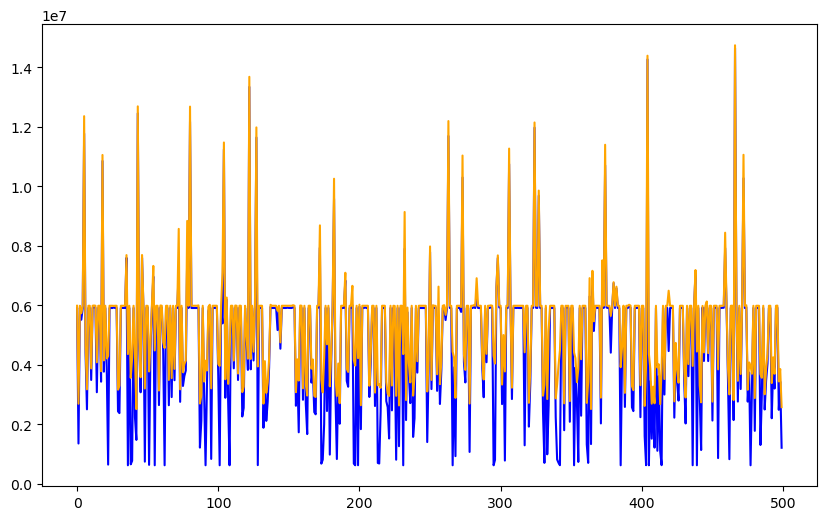

In [79]:
#   Plot training vs testing error

plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors)), train_errors, label="Training Error", color="blue")
plt.plot(range(len(test_errors)), test_errors, label="Testing Error", color="orange")
plt.show()

Use the best trial to define the model

In [80]:
pipeline_1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", define_model(best_trial))
])

In [81]:
#   Fit the pipeline with training data
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', PowerTransformer(),
                                                  ['Day', 'Month', 'Year',
                                                   'Total_Stops', 'Dep_hr',
                                                   'Dep_min', 'Arr_hr',
                                                   'Arr_min', 'Duration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.16985192926351006, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=101, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [82]:
#   Predict on the test set

y_test_pred = pipeline_1.predict(X_test)

In [83]:
#   Predict on the training set
y_train_pred = pipeline_1.predict(X_train)

#   Calculate MSE and R² for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

#   Calculate MSE and R² for the test set
test_mse_final = mean_squared_error(y_test, y_test_pred)
test_r2_final = r2_score(y_test, y_test_pred)

#   Print results
print(f"Training Set MSE: {train_mse:.2f}")
print(f"Training Set R² Score: {train_r2:.2f}")
print(f"Testing Set MSE: {test_mse_final:.2f}")
print(f"Testing Set R² Score: {test_r2_final:.2f}")

Training Set MSE: 1480281.18
Training Set R² Score: 0.91
Testing Set MSE: 2514314.31
Testing Set R² Score: 0.85


In [84]:
#   Show some sample predictions

sample_predictions = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_test_pred
})

In [85]:
print("\nSample Predictions (Actual vs Predicted Prices):")
print(sample_predictions)


Sample Predictions (Actual vs Predicted Prices):
       Actual Price  Predicted Price
1803          13941     11258.178711
321            3841      3890.818848
7316           5911      5990.938965
8064           6121      5937.402832
10055          7662      7383.316406
...             ...              ...
5683           4823      4513.875977
7713           3807      4046.659668
1897          12898     13504.185547
5718           5201      4172.946777
7488           6593      6670.386719

[2074 rows x 2 columns]


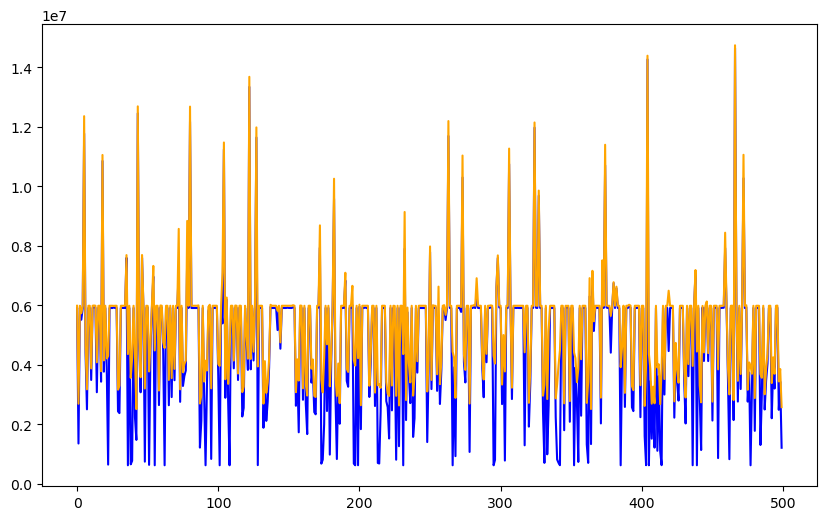

In [86]:
#   Plot training vs testing error
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors)), train_errors, label="Training Error", color="blue")
plt.plot(range(len(test_errors)), test_errors, label="Testing Error", color="orange")
plt.show()

New data point for prediction (example data)

In [94]:
new_data = pd.DataFrame({
    "Airline": ["IndiGo"],
    "Source": ["New Delhi"],
    "Destination": ["Hyderabad"],
    "Day": [21],
    "Month": [12],
    "Year": [2024],
    "Total_Stops": [0],
    "Dep_hr": [9.0],
    "Dep_min": [30.0],
    "Arr_hr": [11.0],
    "Arr_min": [45],
    "Duration": [2.4],
    "Additional_Info": ["No info"]
})

new_data

,Airline,Source,Destination,Day,Month,Year,Total_Stops,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration,Additional_Info
0,IndiGo,New Delhi,Hyderabad,21,12,2024,0,9.0,30.0,11.0,45,2.4,No info


In [95]:
#   Use the pipeline from the best model to predict
predicted_price = pipeline_1.predict(new_data)

#   Output the predicted price
print(f"Predicted Price : {predicted_price[0] + 0.41 * predicted_price[0]:.2f}")

Predicted Price : 6798.79


In [98]:
import pickle as pkl

pkl.dump(dataset, open('dataset.pkl','wb'))
pkl.dump(pipeline_1, open('model.pkl','wb'))